from google.colab import files
uploaded = files.upload()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load datasets from 'datasets/' folder
task_vm_df = pd.read_csv("datasets/task_vm.csv")
vm_df = pd.read_csv("datasets/vm_parameters.csv")

# Merge VM parameters
merged_df = task_vm_df.merge(vm_df, on="VM_ID", how="left")

# Optional: Feature engineering
merged_df["TaskMI_per_MIPS"] = merged_df["TaskMI"] / merged_df["MIPs"]

In [ ]:
print(merged_df.columns)

Index(['Ref_No_x', 'Job_ID', 'Task_ID', 'TaskMI', 'TaskSize', 'DataCenter_ID',
       'VM_ID', 'Job_Depth', 'Actual_CPU_Time', 'Start_Time', 'Finish_Time',
       'Ref_No_y', 'ImgSize', 'VM_Memory', 'MIPs', 'Bandwidth', 'PES',
       'TaskMI_per_MIPS'],
      dtype='object')


In [ ]:
merged_df = merged_df.sample(n=40000, random_state=42)

In [ ]:
# Feature columns to use
features = [
    "TaskMI", "TaskSize", "Job_Depth", "MIPs",
    "Bandwidth", "VM_Memory", "PES", "TaskMI_per_MIPS"
]

# Target variable
merged_df["Execution_Time"] = merged_df["Finish_Time"] - merged_df["Start_Time"]

X = merged_df[features]
y = merged_df["Execution_Time"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 237673.19460700758
R² Score: 0.9616447323443706


In [ ]:
# Example: predict for first 5 test samples
predicted_times = model.predict(X_test[:5])
print(predicted_times)


[1.16568672 1.43806053 8.94049651 3.98166944 1.13823628]


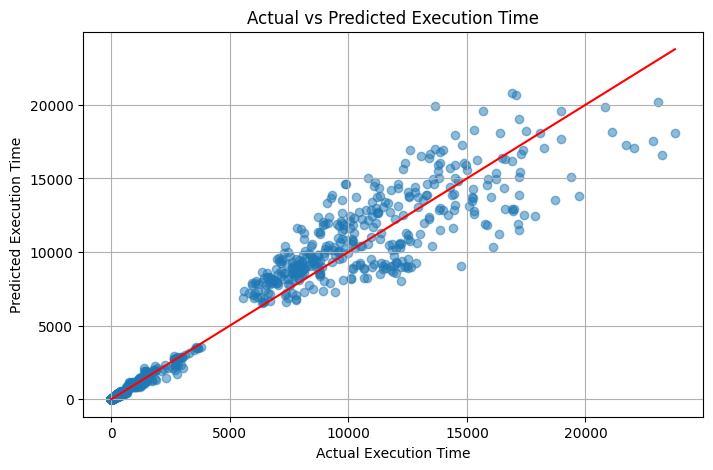

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Execution Time")
plt.ylabel("Predicted Execution Time")
plt.title("Actual vs Predicted Execution Time")
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # perfect line
plt.show()


TASK MI
10137152    2
9532875     2
8661292     2
4738058     2
1902028     2
           ..
4326014     2
8869028     2
11565638    2
3446650     2
8430508     2
Name: TaskMI, Length: 8000, dtype: int64
MIPS
10137152    1500.0
9532875     1577.0
8661292     1984.0
4738058     1925.0
1902028     1536.0
             ...  
4326014     1137.0
8869028     1999.0
11565638    1084.0
3446650     1559.0
8430508     1652.0
Name: MIPs, Length: 8000, dtype: float64
PREDICTION
10137152    0.001333
9532875     0.001268
8661292     0.001008
4738058     0.001039
1902028     0.001302
              ...   
4326014     0.001759
8869028     0.001001
11565638    0.001845
3446650     0.001283
8430508     0.001211
Length: 8000, dtype: float64


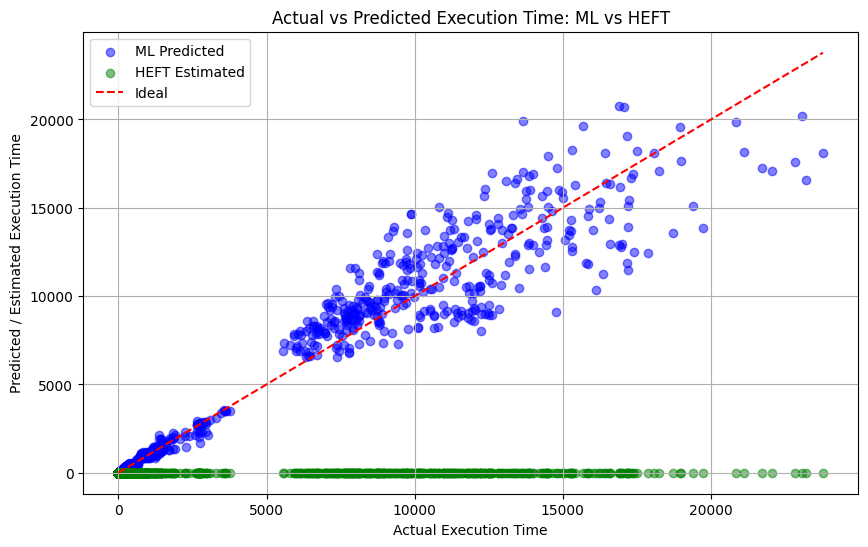

In [ ]:
import matplotlib.pyplot as plt

# Example: calculating HEFT-estimated time (if you haven't done it already)
# You can replace this with actual data if available
heft_pred = X_test["TaskMI"] / X_test["MIPs"]

plt.figure(figsize=(10,6))

# Plot ML predictions
plt.scatter(y_test, y_pred, alpha=0.5, label="ML Predicted", color="blue")

# Plot HEFT predictions
plt.scatter(y_test, heft_pred, alpha=0.5, label="HEFT Estimated", color="green")

# Perfect line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal")

plt.xlabel("Actual Execution Time")
plt.ylabel("Predicted / Estimated Execution Time")
plt.title("Actual vs Predicted Execution Time: ML vs HEFT")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'execution_time_predictor.pkl')


['execution_time_predictor.pkl']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📏 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🧠 R² Score: {r2:.4f}")


📉 Mean Squared Error (MSE): 237673.19
📏 Root Mean Squared Error (RMSE): 487.52
📊 Mean Absolute Error (MAE): 96.40
🧠 R² Score: 0.9616


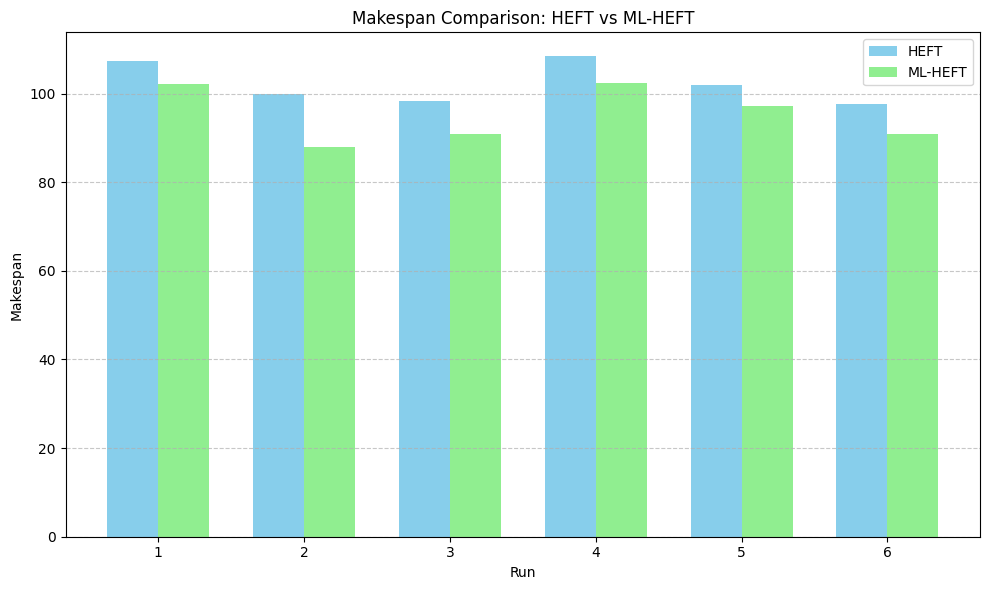

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Makespans from HEFT and ML-HEFT
heft = [107.33281, 99.9079, 98.2599, 108.3847, 101.9405, 97.5812]
mlheft = [102.1977, 87.8243, 90.7765, 102.3162, 97.0840, 90.8859]

runs = np.arange(1, len(heft) + 1)

plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(runs - bar_width/2, heft, width=bar_width, label='HEFT', color='skyblue')
plt.bar(runs + bar_width/2, mlheft, width=bar_width, label='ML-HEFT', color='lightgreen')

plt.xlabel('Run')
plt.ylabel('Makespan')
plt.title('Makespan Comparison: HEFT vs ML-HEFT')
plt.xticks(runs)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


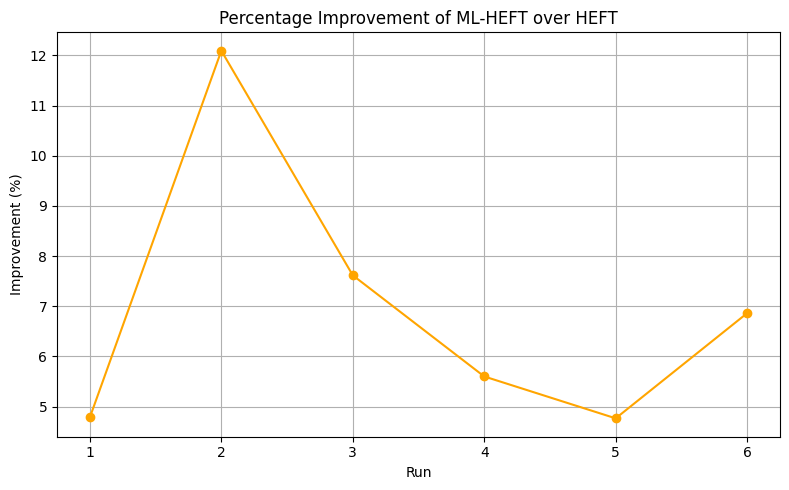

In [4]:
improvement = [(h - m) / h * 100 for h, m in zip(heft, mlheft)]

plt.figure(figsize=(8, 5))
plt.plot(runs, improvement, marker='o', color='orange')
plt.title('Percentage Improvement of ML-HEFT over HEFT')
plt.xlabel('Run')
plt.ylabel('Improvement (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


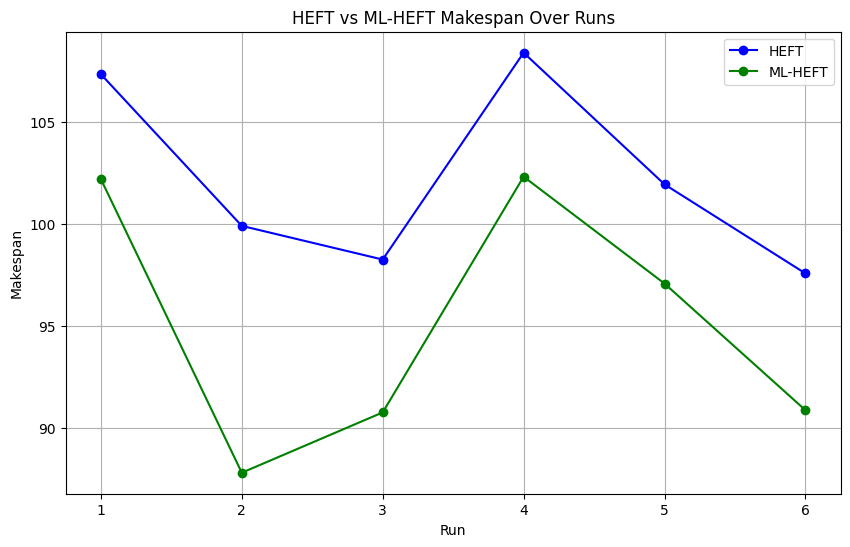

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(runs, heft, marker='o', label='HEFT', color='blue')
plt.plot(runs, mlheft, marker='o', label='ML-HEFT', color='green')
plt.xlabel('Run')
plt.ylabel('Makespan')
plt.title('HEFT vs ML-HEFT Makespan Over Runs')
plt.legend()
plt.grid(True)
plt.show()


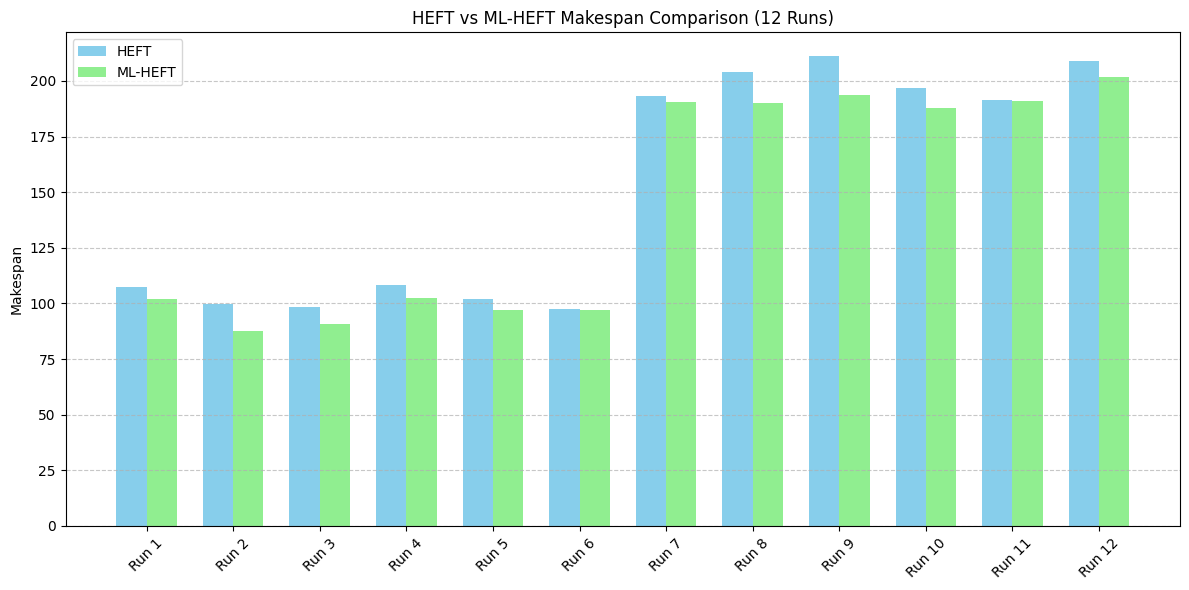

In [6]:
import matplotlib.pyplot as plt
import numpy as np

heft1 = [107.33, 99.91, 98.26, 108.38, 101.94, 97.58]
mlheft1 = [102.20, 87.82, 90.78, 102.32, 97.08, 96.89]

heft2 = [193.14, 203.93, 211.29, 196.84, 191.25, 208.91]
mlheft2 = [190.35, 189.89, 193.91, 187.68, 190.88, 201.68]

runs1 = [f'Run {i+1}' for i in range(6)]
runs2 = [f'Run {i+7}' for i in range(6)]

all_runs = runs1 + runs2
heft = heft1 + heft2
mlheft = mlheft1 + mlheft2

x = np.arange(len(all_runs))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, heft, width, label='HEFT', color='skyblue')
plt.bar(x + width/2, mlheft, width, label='ML-HEFT', color='lightgreen')
plt.xticks(x, all_runs, rotation=45)
plt.ylabel("Makespan")
plt.title("HEFT vs ML-HEFT Makespan Comparison (12 Runs)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


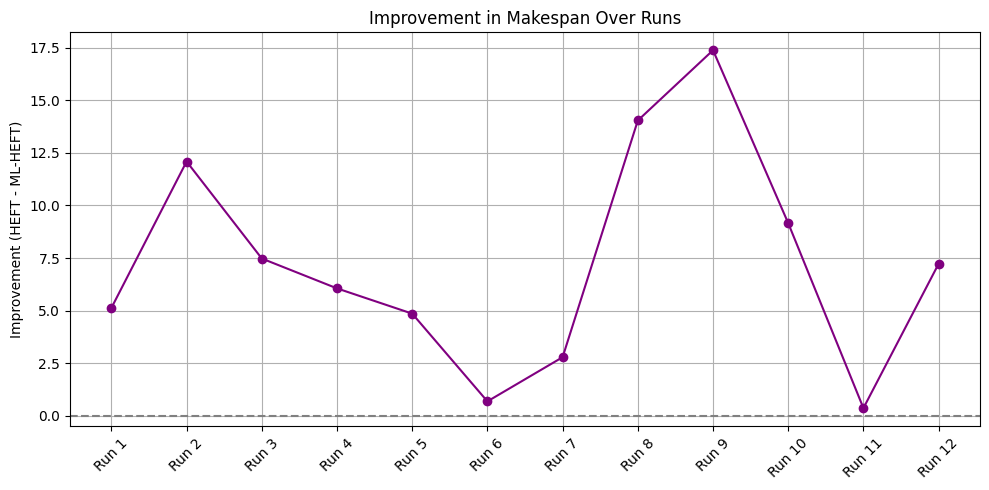

In [7]:
improvements = [h - m for h, m in zip(heft, mlheft)]

plt.figure(figsize=(10,5))
plt.plot(all_runs, improvements, marker='o', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Improvement (HEFT - ML-HEFT)")
plt.title("Improvement in Makespan Over Runs")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


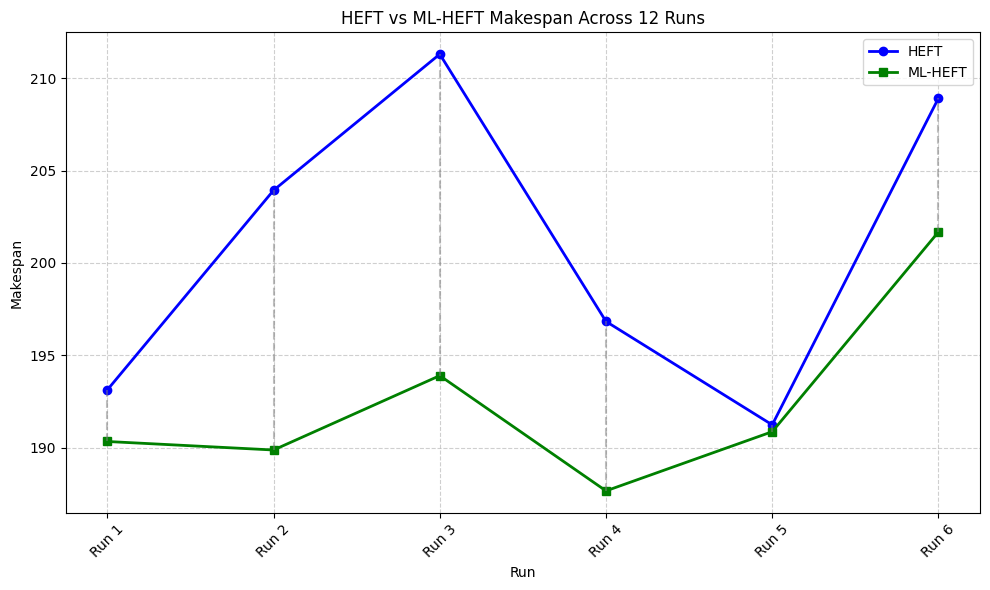

In [10]:
import matplotlib.pyplot as plt

# Data
heft = [193.14, 203.93, 211.29, 196.84, 191.25, 208.91]
mlheft = [ 190.35, 189.89, 193.91, 187.68, 190.88, 201.68]
runs = [f"Run {i+1}" for i in range(6)]

# Plot
plt.figure(figsize=(10,6))
plt.plot(runs, heft, marker='o', label='HEFT', color='blue', linewidth=2)
plt.plot(runs, mlheft, marker='s', label='ML-HEFT', color='green', linewidth=2)

# Highlight improvements
for i in range(len(runs)):
    plt.plot([runs[i], runs[i]], [mlheft[i], heft[i]], color='gray', linestyle='--', alpha=0.5)

plt.title("HEFT vs ML-HEFT Makespan Across 12 Runs")
plt.xlabel("Run")
plt.ylabel("Makespan")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
